# Week 6. Optimization. Programming Task

Let us consider the **House Pricing** dataset, where you have a lot of information about the houses being sold and you aim to produce the price of the house. 

Firstly, let us import basic libraries (`numpy` ([docs](https://numpy.org/)) for matrix operations and `pandas` ([docs](https://pandas.pydata.org/)) for convinient dataset workaround):

In [111]:
import numpy as np
import pandas as pd

### Task 1. Reading and Preparing

In [112]:
datX=np.load('x_train.npy')
datY=np.log(np.load('y_train.npy'))
datX=pd.DataFrame(datX, columns=datX.dtype.names)
y = datY
datX

,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long
0,2014-09-16,5.0,3.25,3710,34200,2.0,False,3,8,2510,1200,1986,0,98074,47.610100,-122.046997
1,2014-11-18,3.0,1.75,2820,8879,1.0,False,5,7,1540,1280,1920,1957,98146,47.509399,-122.375999
2,2014-11-10,3.0,1.00,1240,239144,1.0,False,3,6,1240,0,1921,1992,98038,47.430302,-122.045998
3,2015-04-16,4.0,2.50,2670,8279,2.0,False,3,7,2670,0,1999,0,98148,47.429199,-122.328003
4,2014-07-23,3.0,2.25,2700,4025,2.0,False,4,8,1760,940,1907,0,98122,47.607399,-122.293999
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14995,2014-05-21,4.0,2.75,2290,6120,2.0,False,4,7,2170,120,1926,0,98115,47.674599,-122.327003
14996,2015-04-01,3.0,2.00,1430,9250,1.0,False,4,8,990,440,1983,0,98052,47.695202,-122.096001
14997,2014-07-11,2.0,1.00,640,7768,1.0,False,3,6,640,0,1942,0,98106,47.514999,-122.359001
14998,2014-05-15,3.0,1.00,1630,10304,1.0,False,5,7,1630,0,1953,0,98155,47.754799,-122.317001


Okay, we manage to load the data (you can read more about the `load` [here](https://docs.scipy.org/doc/numpy/reference/generated/numpy.load.html). But it is not a necessity). We are going to use linear models to work with it, but firstly we need to come up with idea what features should we include in the model at all (which feature the price is lineary dependent on):

Do not forget to install seaborn. You can do that by running `pip install seaborn` in the command line locally, or simply by running the next sell:

In [113]:
#!pip install seaborn

In order to do it let us plot every feature vs the price. Firstly, we import nice plotting modules:

In [114]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

%matplotlib inline

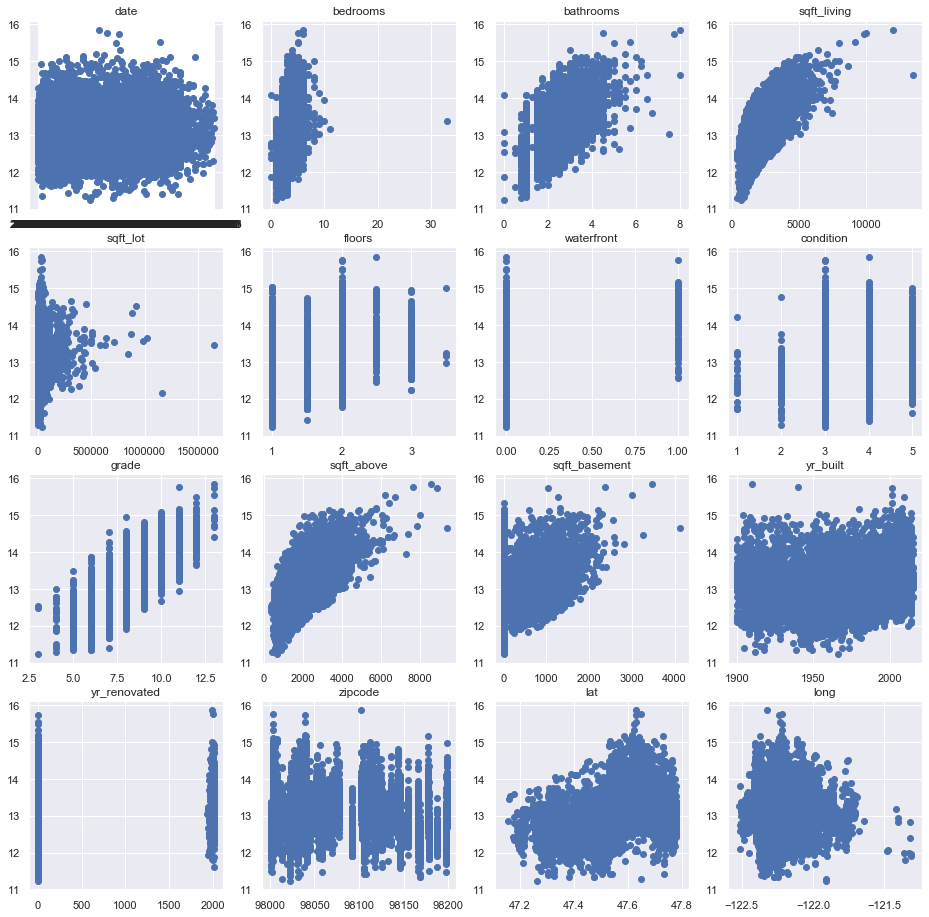

In [115]:
f, ax=plt.subplots(4, 4, figsize=(16,16))

for i, name in enumerate(datX.columns):
    ax[i//4][i%4].scatter(datX[name], y)
    ax[i//4][i%4].set_title(name)

Let us say, that we choose to work the following set of features:
+ `bedrooms`
+ `bathrooms`
+ `sqft_living`
+ `floors`
+ `condition`
+ `grade`
+ `sqft_above`
+ `sqft_basement`
+ `long`
+ `lat`

Clear the dataset from all the other features and create:
1. matrix $X$, all elements should be real numbers
2. number $N$ -- number of considered houses
3. number $m$ -- number of new features

**Hint**: it is easier to clean columns from dataset (you should look [here](https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html) for insipration) and the get a matrix with `.values`

In [116]:
from sklearn import preprocessing
X = np.array(datX[["bedrooms", "bathrooms", "sqft_living", "floors", "condition", "grade", "sqft_above", "sqft_basement", "long", "lat"]])
X = preprocessing.normalize(X)
N = X.shape[0]
m = X.shape[1]


Run the following cell to automatically check results of your code:

In [117]:
from checker import Reader
Reader(X,N,m)

All passed
Total check:  3 /3


Consider that we are interested in the loss of the model we discussed in the video:

+ Assume we have input data that is denoted as $\vec{x}_1, \vec{x}_2, \ldots, \vec{x}_N$
+ House prices for this input data are known $y_1, y_2, \ldots, y_N$

We propose a **simple linear model** for this task:

$$ \hat{y}_i=w_0+w_1x_1+w_2x_2+\ldots+w_mx_m $$

As a loss function we will use the mean squared error (**MSE**):

$$
Loss(\vec{w})=\frac{1}{N}\sum_{i=1}^N (y_i-\hat{y}_i)^2
$$

### Task 2. Compute analytically the $Loss(\vec{w})$ function
Please, keep the signature of the function and enter the code only under `your code goes here`. 
**Attention**: try to avoid usage of `for` cycles! The easiest way to do it is by using matrix operations.

_Hint_: to get nice $w_0$ coefficient it is convinient to add to the `X` matrix the column of 1 with `np.concatenate` [documentation](https://docs.scipy.org/doc/numpy/reference/generated/numpy.concatenate.html)

In [118]:
def loss(w, X, y):
    
    o = np.ones([15000, 1])
    X = np.concatenate([o,X], axis = 1)
    ycap = X@w
    lossValue = np.sum((y-ycap)**2)/15000
       
    return lossValue

Run the following cell to automatically check results of your code:

In [119]:
from checker import lossOK
lossOK(loss, X, y)

Random test  0 :  OK, time_User= 0.0 s;  timeBaseline= 0.0 s
Random test  1 :  OK, time_User= 0.0 s;  timeBaseline= 0.014976024627685547 s
Random test  2 :  OK, time_User= 0.0 s;  timeBaseline= 0.0 s
Random test  3 :  OK, time_User= 0.0 s;  timeBaseline= 0.0 s
Random test  4 :  OK, time_User= 0.0 s;  timeBaseline= 0.0 s
Random test  5 :  OK, time_User= 0.0 s;  timeBaseline= 0.0 s
Random test  6 :  OK, time_User= 0.0 s;  timeBaseline= 0.0 s
Random test  7 :  OK, time_User= 0.0 s;  timeBaseline= 0.0 s
Random test  8 :  OK, time_User= 0.0 s;  timeBaseline= 0.01562190055847168 s
Random test  9 :  OK, time_User= 0.0 s;  timeBaseline= 0.0 s
All passed
Total check:  10 /10


### Task 3. Compute analyticaly the gradient of the $Loss(\vec{w})$
Please, enter your answer in the cell below (it should be a `markdown` cell). You can either specify each partial derivative $\frac{\partial Loss}{\partial w_i}$ or $\nabla Loss$ altogether using matrix operations.

Here I have used Matrix Operations:- 
$$ -2/N*(X^T*(y - yhat)) $$

### Task 4. Write a function to compute the gradient of the Loss function in the given point
Please, keep the signature of the function and enter the code only under `your code goes here`. 
**Attention**: try to avoid usage of `for` cycles! The easiest way to do it is by using matrix operations.

In [120]:
def grad(w_k, X, y):
    
    o = np.ones([15000, 1])
    X = np.concatenate([o,X], axis = 1)
    lossGradient = -2/15000 * (X.T@(y-X@w_k))
    
    return lossGradient

Run the following cell to automatically check your function. You will also see time comparison: if your function works sufficiently slower, you probably should think of faster alternative.

In [121]:
from checker import gradOK    
gradOK(grad, X, y)

Random test  0 :  OK, time_User= 0.0 s;  timeBaseline= 0.0 s
Random test  1 :  OK, time_User= 0.0 s;  timeBaseline= 0.0 s
Random test  2 :  OK, time_User= 0.0 s;  timeBaseline= 0.0 s
Random test  3 :  OK, time_User= 0.0 s;  timeBaseline= 0.0 s
Random test  4 :  OK, time_User= 0.0 s;  timeBaseline= 0.0 s
Random test  5 :  OK, time_User= 0.0 s;  timeBaseline= 0.0 s
Random test  6 :  OK, time_User= 0.0 s;  timeBaseline= 0.015584945678710938 s
Random test  7 :  OK, time_User= 0.0 s;  timeBaseline= 0.0 s
Random test  8 :  OK, time_User= 0.0 s;  timeBaseline= 0.0 s
Random test  9 :  OK, time_User= 0.0 s;  timeBaseline= 0.0 s
All passed
Total check:  10 /10


### Task 5. Write gradient descent
How it is time to formulate the gradient descent! As you remeember, the idea here is that:
$$
\vec{w}^{k+1}=\vec{w}^{k}-\alpha_k\cdot \nabla Loss(\vec{w}^{k}
$$
We propose that you use constant $\alpha_k=\alpha$. Assume that the method should stop in two cases:
+ if the number of iterations is to high (`maxiter`)
+ if the length of the gradient is low enough (<`eps`) to call an extremum

Please, keep the signature of the function and enter the code only under `your code goes here`. 

In [126]:
def gradDescent(w_init, alpha, X, y, maxiter=500, eps=1e-2):
    losses=[]
    weights=[w_init]
    
    curiter=0
    w_k=weights[-1]
    
    
    while curiter<maxiter:
        w_k = w_k - alpha*grad(w_k, X, y)
        lossValue_k = loss(w_k, X, y)
        
        weights.append(w_k)
        losses.append(lossValue_k)
        curiter+=1
    return weights, losses

w_init = np.random.rand(X.shape[1]+1)
weights1,losses1 = gradDescent(w_init, 0.01,X,y)
weights2,losses2 = gradDescent(w_init, 0.1,X,y)

Experiment with several alphas and several intial values of weights. To illustrate, provide graphs for the Loss function over iterations in each case (and, optionally, the distance between weigths from one iteration to the next):

(we provided all key plotting commands for you, but you can always look into [this tutorial](https://matplotlib.org/tutorials/introductory/usage.html#sphx-glr-tutorials-introductory-usage-py))

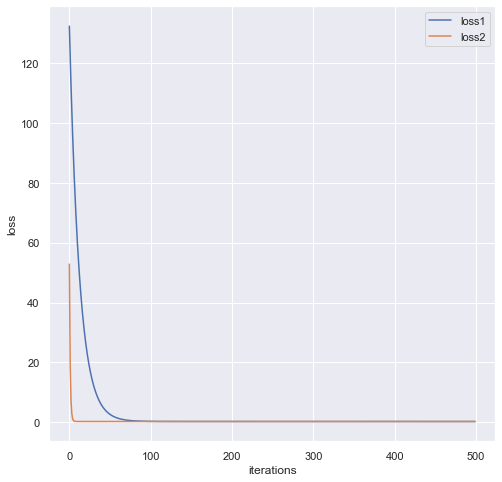

In [130]:
plt.figure(figsize=(8,8))

plt.plot(losses1, label = "loss1")
plt.plot(losses2, label = "loss2")
plt.xlabel("iterations")
plt.ylabel("loss")
plt.legend()

Let us check the adequacy of the model we created.

Choose several (no less then five) houses (inputs in your `X` matrix) and calculte predicted prices by:

$$ \hat{y}_i=w_0+w_1x_1+w_2x_2+\ldots+w_mx_m $$

In [124]:
X_test = np.concatenate((np.ones((6,1)) , X[0:6]), axis = 1)
y_pred = X_test@weights[-1]
print("Predicted : ",y_pred)
print("Actual: ",datY[0:6])

Predicted :  [13.25023308 13.12355843 12.9523731  12.99119177 13.2303291  13.04585727]
Actual:  [13.36138028 13.031782   12.36307639 12.9360338  13.22220871 13.77155867]


Compare predicted values with an actual answer (stored in your `y` array). Is it satisfying enough?

Yes, it is.

### Task 6. Discussion
Answer following questions:
1. Does your method converge at least for some alpha? If not, what might be the workaround?
2. How does changing of the alpha influence the speed of convergence?
3. Are the optimal weights in all convergent cases the same?
4. How does this affect the Loss function?

1. Yes,it does. If it doesn't then try normalizing the data.

2. Increasing alpha results in fatser convergence and decreasing it results in slower convergence.

3. Yes, they are the same. 

4. The optimal weight results in minimum value of the loss function.